# Tutorial 2 - RNN Time Series

In this notebook, we will predict the stock prices for **Nestle**

In [204]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error


# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [205]:
import yfinance as yf
import pandas as pd
# Define the ticker symbol for Berkshire Hathaway
ticker = "NESTLEIND.NS"

# Get the stock data from Yahoo Finance for the past 100 days
data = yf.download(ticker, period="250d", interval="1d")

# Extract the closing prices for the past 240 days
stock_price = data["Close"][-240:]
# Convert the Series to a DataFrame with headers
nestle240days = pd.DataFrame({'Date': stock_price.index, 'Close': stock_price.values})




[*********************100%***********************]  1 of 1 completed


## Reading the data

In [206]:
#nestle = pd.read_csv("C:/Users/simra/Downloads/NESTLEIND.NS.csv")

nestle240days

,Date,Close
0,2022-05-04,18087.750000
1,2022-05-05,17603.750000
2,2022-05-06,16995.449219
3,2022-05-09,16504.349609
4,2022-05-10,16520.599609
...,...,...
235,2023-04-13,19465.349609
236,2023-04-17,20244.400391
237,2023-04-18,20661.250000
238,2023-04-19,20618.699219


In [207]:
#Drop the columns we don't need

#nestle = nestle.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [208]:
nestle240days['Date']=pd.to_datetime(nestle240days['Date'],infer_datetime_format=False)

In [209]:
nestle240days

,Date,Close
0,2022-05-04,18087.750000
1,2022-05-05,17603.750000
2,2022-05-06,16995.449219
3,2022-05-09,16504.349609
4,2022-05-10,16520.599609
...,...,...
235,2023-04-13,19465.349609
236,2023-04-17,20244.400391
237,2023-04-18,20661.250000
238,2023-04-19,20618.699219


<Axes: xlabel='Date'>

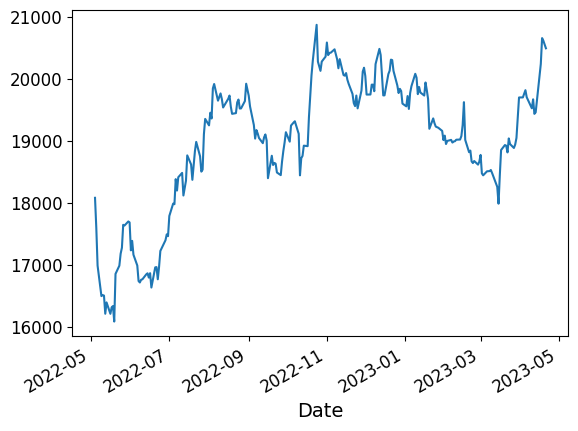

In [210]:
nestle240days.set_index('Date')['Close'].plot()  #a function in datetime format

In [211]:
nestle240days.shape

(240, 2)

In [212]:
#nestle240days=pd.DataFrame(nestle.head(240)) #as we need 10 day frames hence taken 240 because in the announcement we were allowed to take as many rows as we want and not particularly 100

In [213]:
# Re-organize the data set by day and hours

nes = np.array(nestle240days['Close']).reshape(24,10)

nes

array([[18087.75      , 17603.75      , 16995.44921875, 16504.34960938,
        16520.59960938, 16512.40039062, 16220.        , 16402.94921875,
        16218.84960938, 16323.40039062],
       [16343.59960938, 16094.25      , 16862.        , 16994.30078125,
        17187.09960938, 17283.75      , 17652.5       , 17641.05078125,
        17706.90039062, 17691.5       ],
       [17241.55078125, 17393.80078125, 17171.        , 16996.90039062,
        16746.90039062, 16723.75      , 16768.15039062, 16774.90039062,
        16854.44921875, 16871.44921875],
       [16802.30078125, 16874.        , 16642.40039062, 16967.09960938,
        16971.80078125, 16775.15039062, 16976.30078125, 17231.65039062,
        17358.25      , 17403.90039062],
       [17499.05078125, 17470.        , 17795.05078125, 17994.55078125,
        17985.        , 18388.65039062, 18204.94921875, 18419.15039062,
        18489.40039062, 18125.15039062],
       [18249.65039062, 18363.30078125, 18771.5       , 18625.40039062,
   

In [214]:
# Convert to dataframe

nes_df = pd.DataFrame(nes, columns=np.arange(0,10,1))

nes_df

,0,1,2,3,4,5,6,7,8,9
0,18087.750000,17603.750000,16995.449219,16504.349609,16520.599609,16512.400391,16220.000000,16402.949219,16218.849609,16323.400391
1,16343.599609,16094.250000,16862.000000,16994.300781,17187.099609,17283.750000,17652.500000,17641.050781,17706.900391,17691.500000
2,17241.550781,17393.800781,17171.000000,16996.900391,16746.900391,16723.750000,16768.150391,16774.900391,16854.449219,16871.449219
3,16802.300781,16874.000000,16642.400391,16967.099609,16971.800781,16775.150391,16976.300781,17231.650391,17358.250000,17403.900391
4,17499.050781,17470.000000,17795.050781,17994.550781,17985.000000,18388.650391,18204.949219,18419.150391,18489.400391,18125.150391
5,18249.650391,18363.300781,18771.500000,18625.400391,18377.699219,18617.099609,18839.949219,18988.949219,18757.550781,18509.500000
6,18541.900391,19112.400391,19359.099609,19255.199219,19458.800781,19365.900391,19850.000000,19921.500000,19652.949219,19769.500000
7,19679.599609,19543.250000,19682.949219,19735.300781,19557.650391,19440.900391,19452.199219,19625.650391,19671.050781,19526.650391
8,19528.099609,19646.349609,19925.849609,19732.949219,19561.800781,19259.699219,19041.900391,19179.300781,19123.750000,19051.250000
9,18968.199219,19063.650391,19108.750000,19009.000000,18404.199219,18765.250000,18616.650391,18649.900391,18638.300781,18495.900391


## Reshape for standardizing

In [215]:
# Let's create a single sequence (i.e., feature) for standardization

nes_1feature = np.array(nes_df).ravel().reshape(-1,1)

nes_1feature.shape

(240, 1)

## Standardize

In [216]:
# Next, standardize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
nes_std = scaler.fit_transform(nes_1feature)

## Reshaping to 10 day format

In [217]:
nes_reshaped = nes_std.reshape(24,10)

nes_reshaped.shape

(24, 10)

## Pandas version

In [218]:
#Pandas version of the reshaped data

pd.DataFrame(nes_reshaped, columns=np.arange(0,10,1))

,0,1,2,3,4,5,6,7,8,9
0,-0.781039,-1.222726,-1.777847,-2.226013,-2.211183,-2.218666,-2.485503,-2.318548,-2.486553,-2.391143
1,-2.372709,-2.600260,-1.899630,-1.778895,-1.602951,-1.514751,-1.178238,-1.188686,-1.128594,-1.142648
2,-1.553261,-1.414321,-1.617644,-1.776523,-2.004667,-2.025793,-1.985274,-1.979115,-1.906520,-1.891006
3,-1.954110,-1.888679,-2.100031,-1.803718,-1.799428,-1.978886,-1.795321,-1.562295,-1.446764,-1.405104
4,-1.318272,-1.344783,-1.048150,-0.866091,-0.874807,-0.506445,-0.674086,-0.478611,-0.414503,-0.746909
5,-0.633293,-0.529578,-0.157066,-0.290393,-0.516439,-0.297968,-0.094600,0.041373,-0.169795,-0.396160
6,-0.366593,0.154032,0.379164,0.284347,0.470149,0.385370,0.827148,0.892397,0.647324,0.753685
7,0.671644,0.547215,0.674701,0.722476,0.560356,0.453813,0.464124,0.622412,0.663843,0.532067
8,0.533389,0.641301,0.896366,0.720330,0.564144,0.288453,0.089695,0.215084,0.164389,0.098228
9,0.022437,0.109544,0.150701,0.059671,-0.492255,-0.162769,-0.298378,-0.268034,-0.278620,-0.408571


## Splitting by chronological order

In [219]:
from sklearn.model_selection import train_test_split

#train, test = train_test_split(temp_reshaped, test_size=0.3)

# if we neede to maintain the ordering of the data, we can use the following code to split the data
split_point = int(len(nes_reshaped)*0.7)
train, test = nes_reshaped[:split_point], nes_reshaped[split_point:]

In [220]:
train.shape

(16, 10)

In [221]:
train[:2]

array([[-0.78103942, -1.22272623, -1.77784695, -2.22601269, -2.21118333,
        -2.21866574, -2.48550334, -2.31854826, -2.48655316, -2.39114262],
       [-2.37270929, -2.60025977, -1.89962951, -1.77889499, -1.60295139,
        -1.51475056, -1.17823814, -1.18868643, -1.12859365, -1.14264768]])

In [222]:
test.shape

(8, 10)

## Create input and target variables

In [223]:
# The first 9 columns (from 0 to 8) are inputs

train_inputs = train[:,:9]


pd.DataFrame(train_inputs, columns=np.arange(0,9,1))

,0,1,2,3,4,5,6,7,8
0,-0.781039,-1.222726,-1.777847,-2.226013,-2.211183,-2.218666,-2.485503,-2.318548,-2.486553
1,-2.372709,-2.600260,-1.899630,-1.778895,-1.602951,-1.514751,-1.178238,-1.188686,-1.128594
2,-1.553261,-1.414321,-1.617644,-1.776523,-2.004667,-2.025793,-1.985274,-1.979115,-1.906520
3,-1.954110,-1.888679,-2.100031,-1.803718,-1.799428,-1.978886,-1.795321,-1.562295,-1.446764
4,-1.318272,-1.344783,-1.048150,-0.866091,-0.874807,-0.506445,-0.674086,-0.478611,-0.414503
5,-0.633293,-0.529578,-0.157066,-0.290393,-0.516439,-0.297968,-0.094600,0.041373,-0.169795
6,-0.366593,0.154032,0.379164,0.284347,0.470149,0.385370,0.827148,0.892397,0.647324
7,0.671644,0.547215,0.674701,0.722476,0.560356,0.453813,0.464124,0.622412,0.663843
8,0.533389,0.641301,0.896366,0.720330,0.564144,0.288453,0.089695,0.215084,0.164389
9,0.022437,0.109544,0.150701,0.059671,-0.492255,-0.162769,-0.298378,-0.268034,-0.278620


## Add 1 more dimension

In [224]:
train_inputs.shape

(16, 9)

In [225]:
#Create an additional dimension for train

train_x = train_inputs[:,:,np.newaxis]

train_x.shape 

(16, 9, 1)

In [226]:
train_x

array([[[-0.78103942],
        [-1.22272623],
        [-1.77784695],
        [-2.22601269],
        [-2.21118333],
        [-2.21866574],
        [-2.48550334],
        [-2.31854826],
        [-2.48655316]],

       [[-2.37270929],
        [-2.60025977],
        [-1.89962951],
        [-1.77889499],
        [-1.60295139],
        [-1.51475056],
        [-1.17823814],
        [-1.18868643],
        [-1.12859365]],

       [[-1.55326056],
        [-1.41432086],
        [-1.61764351],
        [-1.77652265],
        [-2.00466666],
        [-2.02579315],
        [-1.98527442],
        [-1.97911453],
        [-1.90652017]],

       [[-1.95410959],
        [-1.8886786 ],
        [-2.10003086],
        [-1.80371813],
        [-1.79942795],
        [-1.97888639],
        [-1.79532136],
        [-1.56229542],
        [-1.44676365]],

       [[-1.31827223],
        [-1.34478327],
        [-1.04814972],
        [-0.86609079],
        [-0.87480661],
        [-0.50644493],
        [-0.67408622],
   

## Setting target

In [227]:
# The last column (9) is TARGET

train_target = train[:,-1]


pd.DataFrame(train_target, columns=['9'])

,9
0,-2.391143
1,-1.142648
2,-1.891006
3,-1.405104
4,-0.746909
5,-0.396160
6,0.753685
7,0.532067
8,0.098228
9,-0.408571


## Repeat for test

In [228]:
# The first 9 columns (from 0 to 8) are inputs

test_inputs = test[:,:9]

In [229]:
#Create an additional dimension for test

test_x = test_inputs[:,:,np.newaxis]

test_x.shape 

(8, 9, 1)

In [230]:
# The last column (9) is TARGET

test_target = test[:,-1]


pd.DataFrame(test_target, columns=['9'])

,9
0,0.525907
1,0.802827
2,0.010027
3,0.625331
4,-0.421484
5,-0.077990
6,0.695234
7,1.417447


In [231]:
performance = pd.DataFrame({"model": [], "RMSE": []})
performance

,model,RMSE


## Cross sectional NN

In [232]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 1]),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(1, activation=None)
    
])

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 818ms/step - loss: 4.7606
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 4.6293
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 4.5005
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 4.3741
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 4.2505
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 4.1308
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 4.0116
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 3.8921
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 3.7752
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 3.6608
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 3.5490
Epoch 12/100
1/1 [==============================] - 0s 0s/step - loss: 3.4398
Epoch 13/100
1/1 [==============================] - 0s 6ms/

In [233]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 121ms/step


In [234]:
# Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [235]:
comparison

,actual,predicted
0,19519.900391,19970.947266
1,19823.349609,19931.570312
2,18954.599609,19307.714844
3,19628.849609,19060.638672
4,18481.750000,18842.064453
5,18858.150391,18540.398438
6,19705.449219,18907.705078
7,20496.849609,19892.476562


In [236]:
m1=round(mean_squared_error(comparison['actual'], comparison['predicted']),2)

In [237]:
performance = pd.concat([performance, pd.DataFrame({'model':"Cross Sectional NN", 
                                                    'RMSE': m1
                                                    }, index=[0])])
performance

,model,RMSE
0,Cross Sectional NN,236895.54


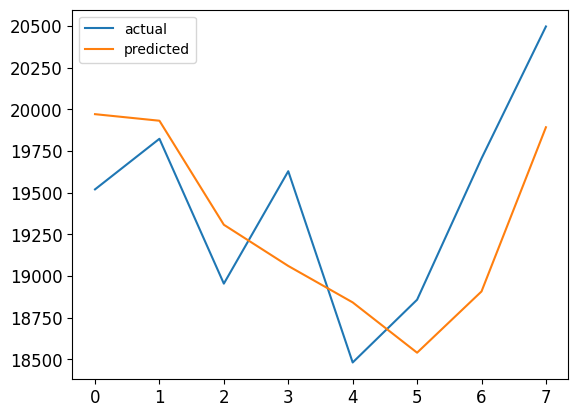

In [238]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## Simple RNN

Simplest Recurrent neural network

In [239]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [240]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 1.0512
Epoch 2/30
1/1 [==============================] - 0s 12ms/step - loss: 0.9742
Epoch 3/30
1/1 [==============================] - 0s 6ms/step - loss: 0.9022
Epoch 4/30
1/1 [==============================] - 0s 11ms/step - loss: 0.8336
Epoch 5/30
1/1 [==============================] - 0s 8ms/step - loss: 0.7667
Epoch 6/30
1/1 [==============================] - 0s 8ms/step - loss: 0.7027
Epoch 7/30
1/1 [==============================] - 0s 9ms/step - loss: 0.6421
Epoch 8/30
1/1 [==============================] - 0s 4ms/step - loss: 0.5827
Epoch 9/30
1/1 [==============================] - 0s 13ms/step - loss: 0.5282
Epoch 10/30
1/1 [==============================] - 0s 7ms/step - loss: 0.4770
Epoch 11/30
1/1 [==============================] - 0s 8ms/step - loss: 0.4317
Epoch 12/30
1/1 [==============================] - 0s 8ms/step - loss: 0.3909
Epoch 13/30
1/1 [==============================] - 0s 9ms/step - loss: 

In [241]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 272ms/step


In [242]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()
comparison

,actual,predicted
0,19519.900391,19741.687500
1,19823.349609,19852.578125
2,18954.599609,19158.892578
3,19628.849609,19134.214844
4,18481.750000,18660.396484
5,18858.150391,18302.226562
6,19705.449219,19114.560547
7,20496.849609,20038.500000


In [243]:
m1=round(mean_squared_error(comparison['actual'], comparison['predicted']),2)
performance = pd.concat([performance, pd.DataFrame({'model':"Simple RNN", 
                                                    'RMSE': m1
                                                    }, index=[0])])
performance

,model,RMSE
0,Cross Sectional NN,236895.54
0,Simple RNN,154580.33


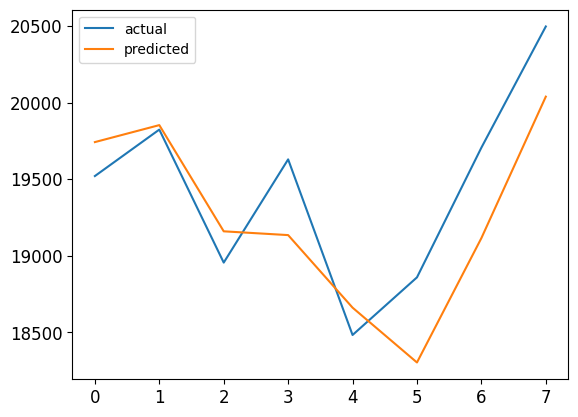

In [244]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## Simple RNN with more layers

**Be careful: when stacking RNN layers, you have to set "return_sequences" to True. This enables the layer to send a "sequence" of values to the next layer -- jut like how it uses a sequence of values for training. However, if the output of RNN is sent to a DENSE layer, then a single value should be sent. That's why there is no "return sequences" right before DENSE layers.**

In [245]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [246]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 1.1495
Epoch 2/30
1/1 [==============================] - 0s 12ms/step - loss: 1.0540
Epoch 3/30
1/1 [==============================] - 0s 10ms/step - loss: 0.9645
Epoch 4/30
1/1 [==============================] - 0s 4ms/step - loss: 0.8823
Epoch 5/30
1/1 [==============================] - 0s 8ms/step - loss: 0.8063
Epoch 6/30
1/1 [==============================] - 0s 8ms/step - loss: 0.7369
Epoch 7/30
1/1 [==============================] - 0s 16ms/step - loss: 0.6708
Epoch 8/30
1/1 [==============================] - 0s 12ms/step - loss: 0.6091
Epoch 9/30
1/1 [==============================] - 0s 11ms/step - loss: 0.5502
Epoch 10/30
1/1 [==============================] - 0s 10ms/step - loss: 0.4925
Epoch 11/30
1/1 [==============================] - 0s 7ms/step - loss: 0.4356
Epoch 12/30
1/1 [==============================] - 0s 9ms/step - loss: 0.3797
Epoch 13/30
1/1 [==============================] - 0s 9ms/step - los

In [247]:
#Predict:
y_pred = model.predict(test_x)


1/1 [==============================] - 0s 442ms/step


In [248]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()
comparison

,actual,predicted
0,19519.900391,19888.328125
1,19823.349609,20008.742188
2,18954.599609,19174.546875
3,19628.849609,19196.824219
4,18481.750000,18658.867188
5,18858.150391,18313.367188
6,19705.449219,19210.843750
7,20496.849609,20557.128906


In [249]:
m1=round(mean_squared_error(comparison['actual'], comparison['predicted']),2)
performance = pd.concat([performance, pd.DataFrame({'model':"Simple RNN with more layers", 
                                                    'RMSE': m1
                                                    }, index=[0])])
performance

,model,RMSE
0,Cross Sectional NN,236895.54
0,Simple RNN,154580.33
0,Simple RNN with more layers,122694.94


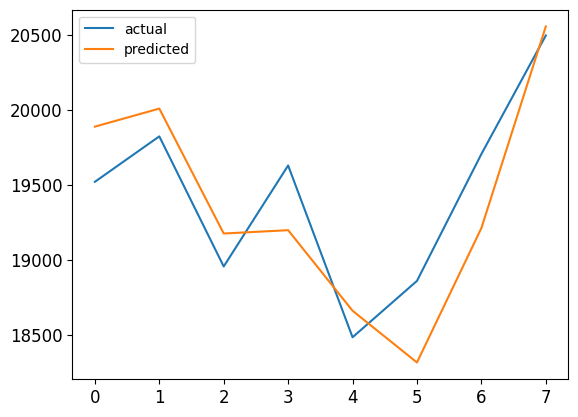

In [250]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## LSTM with 1 layer

In [251]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [252]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 1.2820
Epoch 2/30
1/1 [==============================] - 0s 7ms/step - loss: 1.2501
Epoch 3/30
1/1 [==============================] - 0s 11ms/step - loss: 1.2187
Epoch 4/30
1/1 [==============================] - 0s 14ms/step - loss: 1.1877
Epoch 5/30
1/1 [==============================] - 0s 9ms/step - loss: 1.1570
Epoch 6/30
1/1 [==============================] - 0s 8ms/step - loss: 1.1267
Epoch 7/30
1/1 [==============================] - 0s 9ms/step - loss: 1.0966
Epoch 8/30
1/1 [==============================] - 0s 10ms/step - loss: 1.0668
Epoch 9/30
1/1 [==============================] - 0s 6ms/step - loss: 1.0372
Epoch 10/30
1/1 [==============================] - 0s 8ms/step - loss: 1.0079
Epoch 11/30
1/1 [==============================] - 0s 10ms/step - loss: 0.9789
Epoch 12/30
1/1 [==============================] - 0s 5ms/step - loss: 0.9501
Epoch 13/30
1/1 [==============================] - 0s 9ms/step - loss:

In [253]:
#Predict:
y_pred = model.predict(test_x)


1/1 [==============================] - 0s 327ms/step


In [254]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()
comparison

,actual,predicted
0,19519.900391,19355.078125
1,19823.349609,19407.753906
2,18954.599609,19040.103516
3,19628.849609,19010.242188
4,18481.750000,18775.478516
5,18858.150391,18626.527344
6,19705.449219,19025.656250
7,20496.849609,19516.818359


In [255]:
m1=round(mean_squared_error(comparison['actual'], comparison['predicted']),2)
performance = pd.concat([performance, pd.DataFrame({'model':"LSTM with 1 layer", 
                                                    'RMSE': m1
                                                    }, index=[0])])
performance

,model,RMSE
0,Cross Sectional NN,236895.54
0,Simple RNN,154580.33
0,Simple RNN with more layers,122694.94
0,LSTM with 1 layer,269047.20


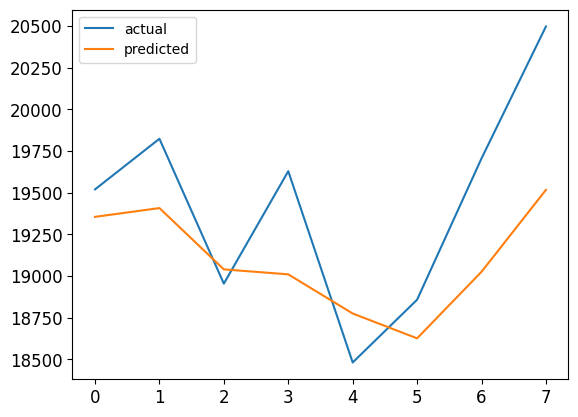

In [256]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## LSTM with more layers

In [257]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='tanh', return_sequences=True, input_shape=[9, 1]),
    keras.layers.LSTM(32, activation='tanh', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [258]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 6s 6s/step - loss: 1.2712
Epoch 2/30
1/1 [==============================] - 0s 19ms/step - loss: 1.1839
Epoch 3/30
1/1 [==============================] - 0s 16ms/step - loss: 1.0993
Epoch 4/30
1/1 [==============================] - 0s 16ms/step - loss: 1.0174
Epoch 5/30
1/1 [==============================] - 0s 15ms/step - loss: 0.9382
Epoch 6/30
1/1 [==============================] - 0s 13ms/step - loss: 0.8617
Epoch 7/30
1/1 [==============================] - 0s 10ms/step - loss: 0.7882
Epoch 8/30
1/1 [==============================] - 0s 11ms/step - loss: 0.7179
Epoch 9/30
1/1 [==============================] - 0s 15ms/step - loss: 0.6511
Epoch 10/30
1/1 [==============================] - 0s 11ms/step - loss: 0.5883
Epoch 11/30
1/1 [==============================] - 0s 20ms/step - loss: 0.5300
Epoch 12/30
1/1 [==============================] - 0s 14ms/step - loss: 0.4767
Epoch 13/30
1/1 [==============================] - 0s 16ms/step

In [259]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 3s 3s/step


In [260]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()
comparison

,actual,predicted
0,19519.900391,20066.572266
1,19823.349609,20058.886719
2,18954.599609,19617.511719
3,19628.849609,19343.896484
4,18481.750000,19026.248047
5,18858.150391,18560.158203
6,19705.449219,19284.109375
7,20496.849609,19997.644531


In [261]:
m1=round(mean_squared_error(comparison['actual'], comparison['predicted']),2)
performance = pd.concat([performance, pd.DataFrame({'model':"LSTM with more layers", 
                                                    'RMSE': m1
                                                    }, index=[0])])
performance

,model,RMSE
0,Cross Sectional NN,236895.54
0,Simple RNN,154580.33
0,Simple RNN with more layers,122694.94
0,LSTM with 1 layer,269047.20
0,LSTM with more layers,210873.63


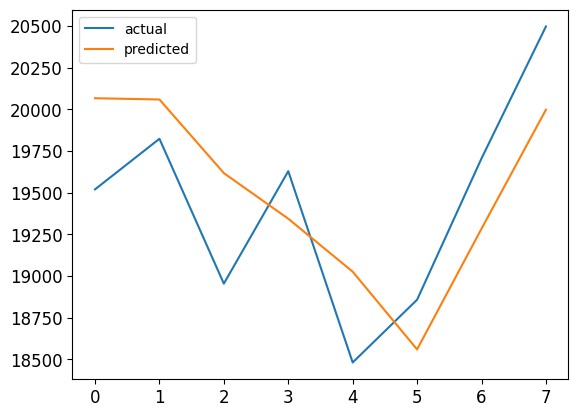

In [262]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## GRU with more layers

In [263]:
model = keras.models.Sequential([
    keras.layers.GRU(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [264]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='RMSprop')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 5s 5s/step - loss: 1.0992
Epoch 2/30
1/1 [==============================] - 0s 14ms/step - loss: 0.9962
Epoch 3/30
1/1 [==============================] - 0s 23ms/step - loss: 0.9193
Epoch 4/30
1/1 [==============================] - 0s 13ms/step - loss: 0.8516
Epoch 5/30
1/1 [==============================] - 0s 20ms/step - loss: 0.7904
Epoch 6/30
1/1 [==============================] - 0s 18ms/step - loss: 0.7331
Epoch 7/30
1/1 [==============================] - 0s 17ms/step - loss: 0.6785
Epoch 8/30
1/1 [==============================] - 0s 15ms/step - loss: 0.6264
Epoch 9/30
1/1 [==============================] - 0s 19ms/step - loss: 0.5760
Epoch 10/30
1/1 [==============================] - 0s 8ms/step - loss: 0.5273
Epoch 11/30
1/1 [==============================] - 0s 15ms/step - loss: 0.4804
Epoch 12/30
1/1 [==============================] - 0s 18ms/step - loss: 0.4355
Epoch 13/30
1/1 [==============================] - 0s 17ms/step 

In [265]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 552ms/step


In [266]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()
comparison

,actual,predicted
0,19519.900391,19768.646484
1,19823.349609,19914.503906
2,18954.599609,19143.548828
3,19628.849609,19113.988281
4,18481.750000,18566.837891
5,18858.150391,18150.884766
6,19705.449219,19170.205078
7,20496.849609,20232.564453


In [267]:
m1=round(mean_squared_error(comparison['actual'], comparison['predicted']),2)
performance = pd.concat([performance, pd.DataFrame({'model':"GRU with more layers", 
                                                    'RMSE': m1
                                                    }, index=[0])])
performance

,model,RMSE
0,Cross Sectional NN,236895.54
0,Simple RNN,154580.33
0,Simple RNN with more layers,122694.94
0,LSTM with 1 layer,269047.20
0,LSTM with more layers,210873.63
0,GRU with more layers,154345.66


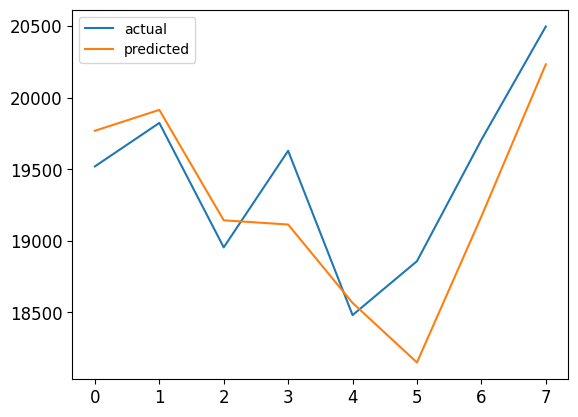

In [268]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## Conv1d

### Last Layer: GRU (you can change it to SimpleRNN or LSTM as well)

In [269]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=True),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [270]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 5s 5s/step - loss: 1.2335
Epoch 2/30
1/1 [==============================] - 0s 52ms/step - loss: 1.1680
Epoch 3/30
1/1 [==============================] - 0s 46ms/step - loss: 1.1091
Epoch 4/30
1/1 [==============================] - 0s 55ms/step - loss: 1.0548
Epoch 5/30
1/1 [==============================] - 0s 52ms/step - loss: 1.0019
Epoch 6/30
1/1 [==============================] - 0s 53ms/step - loss: 0.9511
Epoch 7/30
1/1 [==============================] - 0s 52ms/step - loss: 0.9008
Epoch 8/30
1/1 [==============================] - 0s 48ms/step - loss: 0.8517
Epoch 9/30
1/1 [==============================] - 0s 51ms/step - loss: 0.8034
Epoch 10/30
1/1 [==============================] - 0s 65ms/step - loss: 0.7559
Epoch 11/30
1/1 [==============================] - 0s 49ms/step - loss: 0.7104
Epoch 12/30
1/1 [==============================] - 0s 55ms/step - loss: 0.6661
Epoch 13/30
1/1 [==============================] - 0s 56ms/step

In [271]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 580ms/step


In [272]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()
comparison

,actual,predicted
0,19519.900391,19840.197266
1,19823.349609,19929.888672
2,18954.599609,19338.824219
3,19628.849609,19187.650391
4,18481.750000,18560.792969
5,18858.150391,18181.173828
6,19705.449219,19136.070312
7,20496.849609,20047.435547


In [273]:
m1=round(mean_squared_error(comparison['actual'], comparison['predicted']),2)
performance = pd.concat([performance, pd.DataFrame({'model':"Conv1d last GRU", 
                                                    'RMSE': m1
                                                    }, index=[0])])
performance

,model,RMSE
0,Cross Sectional NN,236895.54
0,Simple RNN,154580.33
0,Simple RNN with more layers,122694.94
0,LSTM with 1 layer,269047.20
0,LSTM with more layers,210873.63
0,GRU with more layers,154345.66
0,Conv1d last GRU,180867.04


In [274]:
performance.sort_values(by=['RMSE'],ascending=True)

,model,RMSE
0,Simple RNN with more layers,122694.94
0,GRU with more layers,154345.66
0,Simple RNN,154580.33
0,Conv1d last GRU,180867.04
0,LSTM with more layers,210873.63
0,Cross Sectional NN,236895.54
0,LSTM with 1 layer,269047.20


The RMSE score is the measure that denotes the root mean squarred error which should be minimum for optimal model. For this dataset that contains Nestle stock closing price data (last 240 days), Simple RNN with multiple layers prove to be the best considering the parameters chosen for this model. Since the training set, test set, epoch is very small, we are getting the **best performing model** as **simple RNN with more layers** with the lowest RMSE. This isn't actually the best model but with respect to the size of dataset it performs better than others.